# Examples of common kernels for KDE

There are many packages and ways to produce KDEs in Python, namely:
- `scipy.stats.gaussian_kde`
- `sklearn.neighbors.KernelDensity`
- `statsmodels.nonparametric.kde.KDEUnivariate`
- `KDEpy`

Generally visualization techniques rely on the scipy implementation, which is sufficient in most cases. However, in case of large datasets, it can be slow.

For the demos here, we use `KDEpy`.

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
from KDEpy import FFTKDE, NaiveKDE

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rc('font', family='serif')

## Visualizing the kernels

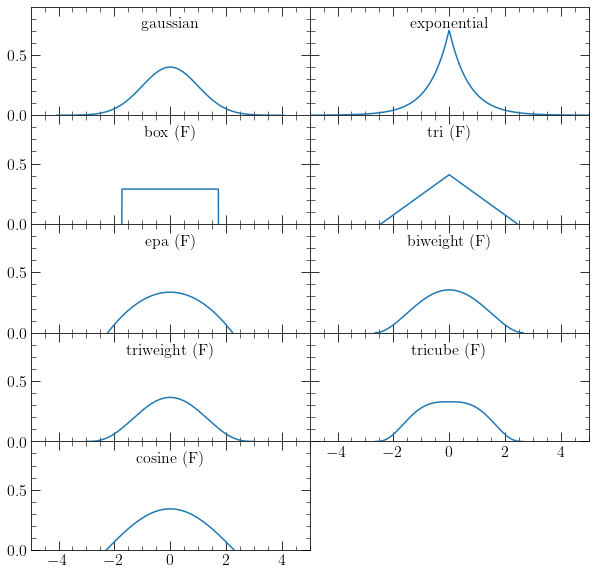

In [2]:
fig = plt.figure(figsize=(10,10))

for i, kernel in enumerate(NaiveKDE._available_kernels.items()):
    name, func = kernel
    x, y = NaiveKDE(kernel=name).fit([0]).evaluate()
    ax = fig.add_subplot(5,2,i+1)
    ax.plot(x, y)
    ax.set_xlim(-5,5)
    ax.set_ylim(0.0,0.9)
    if i<7:
        ax.set_xticklabels([])
    if i%2 ==1:
        ax.set_yticklabels([])
    ax.minorticks_on()
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='major', length=9)
    ax.tick_params(axis='both', which='minor', length=4.5)
    ax.tick_params(axis='both', which='both',direction='in',right=True,top=True)
    #ax.legend(fontsize=16)
    ax.set_title(label=name + (' (F)' if func.finite_support else ''),y=0.75,fontsize=16)
fig.subplots_adjust(wspace=0.0,hspace=0)

## Comparing different kernels for the same data

Demonstrating that the resulting function is not very sensitive to the choice of kernel.

In [3]:
np.random.seed(0)
rand_dist = np.concatenate([sts.cauchy(-5, 1.8).rvs(500),
                            sts.cauchy(-4, 0.8).rvs(2000),
                            sts.cauchy(-1, 0.3).rvs(500),
                            sts.cauchy(2, 0.8).rvs(1000),
                            sts.cauchy(4, 1.5).rvs(500)])

# truncate values to a reasonable range
rand_dist = rand_dist[(rand_dist > -15) & (rand_dist < 15)]

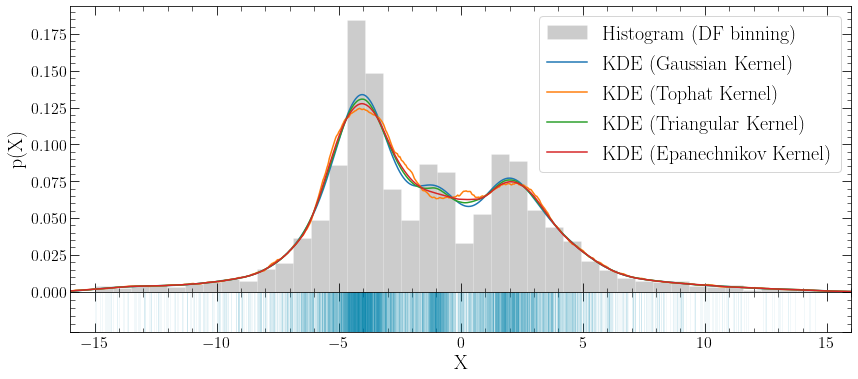

In [4]:
kde_bandwidth = 'silverman'
kde_g_x, kde_g_y = FFTKDE(kernel='gaussian', bw=kde_bandwidth).fit(rand_dist).evaluate()
kde_t_x, kde_t_y = FFTKDE(kernel='tri', bw=kde_bandwidth).fit(rand_dist).evaluate()
kde_b_x, kde_b_y = FFTKDE(kernel='box', bw=kde_bandwidth).fit(rand_dist).evaluate()
kde_e_x, kde_e_y = FFTKDE(kernel='epa', bw=kde_bandwidth).fit(rand_dist).evaluate()


fig = plt.figure(figsize=(14,6))
ax1 = plt.subplot2grid((8,1),(0,0),fig=fig,rowspan=7)
ax1.hist(rand_dist,bins='fd',density=True, color='k',alpha=0.2, label='Histogram (DF binning)',edgecolor='white')

ax1.plot(kde_g_x, kde_g_y, label='KDE (Gaussian Kernel)')
ax1.plot(kde_b_x, kde_b_y, label='KDE (Tophat Kernel)')
ax1.plot(kde_t_x, kde_t_y, label='KDE (Triangular Kernel)')
ax1.plot(kde_e_x, kde_e_y, label='KDE (Epanechnikov Kernel)')

ax1.set_ylabel('p(X)',fontsize=20)
ax1.set_xlim(-16,16)
ax1.legend(fontsize=20)
ax1.minorticks_on()
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(axis='both', which='major', length=9)
ax1.tick_params(axis='both', which='minor', length=4.5)
ax1.tick_params(axis='both', which='both',direction='in',right=True,top=True)
ax1.set_xticklabels([])
ax2 = plt.subplot2grid((8,1),(7,0),fig=fig)
ax2.vlines(rand_dist,0,1,alpha=0.1,linewidth=0.5,color='#0186AF')
ax2.set_xlabel('X',fontsize=20)
ax2.set_ylim(0,1)
ax2.set_xlim(-16,16)
ax2.minorticks_on()
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', length=9)
ax2.tick_params(axis='both', which='minor', length=4.5)
ax2.tick_params(axis='both', which='both',direction='in',right=True,top=True)
ax2.set_yticklabels([])
fig.subplots_adjust(wspace=0.2,hspace=0)